In [196]:
import pandas as pd
import numpy as np
import json
import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [197]:
df = pd.read_csv("lyrics2.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [198]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [199]:
df.reset_index(drop=True, inplace=True)

In [200]:
song_lyrics = df['lyrics']

In [201]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("([a-z])([A-Z])", " \\1", str(song_lyrics[i])).strip()
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", " ", str(song_lyrics[i]))
    song_lyrics[i] = re.sub(r"\s*{.*}\s*", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(' +', ' ', str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].lower()

In [202]:
len(song_lyrics)

37

In [203]:
df['lyrics'] = song_lyrics

In [204]:
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += list("I")

In [205]:
stop_words

['than',
 'which',
 'about',
 'did',
 'd',
 "shouldn't",
 'am',
 'as',
 'through',
 "you've",
 'is',
 'she',
 'be',
 "should've",
 'being',
 'off',
 'few',
 'does',
 "weren't",
 'them',
 'more',
 "hasn't",
 'once',
 'out',
 'such',
 'a',
 'no',
 "it's",
 'by',
 "aren't",
 'if',
 'same',
 'her',
 'their',
 'what',
 'yours',
 'will',
 'during',
 'here',
 'shouldn',
 'at',
 'needn',
 'o',
 'wasn',
 'this',
 'from',
 'until',
 "isn't",
 "you're",
 'its',
 're',
 'against',
 'myself',
 'shan',
 'hers',
 'below',
 'ma',
 'under',
 'he',
 'mustn',
 'were',
 'those',
 'there',
 'had',
 'his',
 'above',
 'on',
 'haven',
 'they',
 'have',
 'has',
 'too',
 'when',
 'wouldn',
 'theirs',
 'very',
 'some',
 'but',
 'me',
 "haven't",
 'nor',
 'don',
 'ourselves',
 'our',
 'of',
 'who',
 "hadn't",
 "mightn't",
 'itself',
 "shan't",
 'ain',
 'how',
 'any',
 'own',
 'do',
 'yourselves',
 'didn',
 "won't",
 'these',
 'most',
 'an',
 'we',
 'and',
 'why',
 'doesn',
 'isn',
 'in',
 'yourself',
 'then',
 'b

In [206]:
flat_lyrics = " ".join(df['lyrics'].values)

In [207]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_lyrics = tokenizer.tokenize(flat_lyrics)

In [208]:
lyrics_no_stop_words = [word for word in tokenized_lyrics if word not in stop_words]

In [209]:
import matplotlib.pyplot as plt

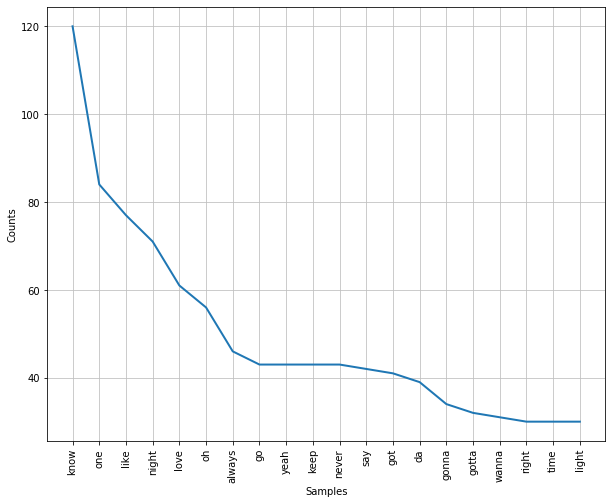

In [210]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(lyrics_no_stop_words).plot(20)
plt.show()

In [219]:
for i, row in df.iterrows():
    row[i, 'lyrics'] = re.sub(",", " ", str(df[i, 'lyrics']))

KeyError: (0, 'lyrics')

In [212]:
sid = SentimentIntensityAnalyzer()

In [213]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [214]:
df

,track_name,artist,lyrics,neg,neu,pos,compound
0,Break Up Song,Little Mix,"this is not a second chance, no, no, bab yhis...",0.097,0.766,0.137,0.6527
1,This City,Sam Fischer,i've been seeing lonely people in crowded roo...,0.064,0.802,0.133,0.9837
2,Watermelon Sugar,Harry Styles,tastes like strawberries on a summer evenin'a...,0.000,0.858,0.142,0.9101
3,Fake Friends (feat. Alex Hosking),PS1,"it’s the middle of the night, what the fuck we...",0.284,0.618,0.099,-0.9952
4,Know Your Worth,Khalid,he keeps leaving you for dead i don't know wh...,0.146,0.703,0.151,0.2309
5,Say So (feat. Nicki Minaj),Doja Cat,"yeah, you know it mmm, this the remix doja, r...",0.120,0.715,0.166,0.9119
6,Roses - Imanbek Remix,SAINt JHN,rose s walked in the corner with the body scr...,0.106,0.778,0.116,-0.0176
7,death bed (coffee for your head) (feat. beabad...,Powfu,"don't stay awake for too long, don't go to be...",0.055,0.813,0.132,0.9675
8,Surrender,Natalie Taylor,we let the waters rise we drifted to survive ...,0.018,0.607,0.375,0.9956
9,Like It Is,Kygo,maybe you should leave this girl alon eut you...,0.039,0.850,0.112,0.8639


In [48]:
sample_tfidf = TfidfVectorizer(lowercase=True,
                              stop_words=stop_words,
                              tokenizer=tokenizer.tokenize,
                              min_df=1)

In [49]:
sample_sparse = sample_tfidf.fit_transform(song_lyrics)

In [50]:
sample_exp = pd.DataFrame(sample_sparse.toarray(), 
                        columns=sample_tfidf.get_feature_names())

sample_exp.head()

,aand,abloh,absurd,academy,accept,accepted,access,achieve,achieving,acrobat,...,yo,york,young,youthful,yuh,yumi,yungen,zing,zones,zoom
0,0.0,0.0,0.02173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
